# Analysis notebook
This notebook contains development and analysis code for the automatic dijkprofile annotation project. For the main code look at the `dijk_profile_annotation.ipynb` notebook. I left this notebook here for completeness.

```
#-------------------------------------------------------------------------------
# Name:        dijk_analysis
# Purpose:     Development code for dijkprofile annotation project
#
# Author:      jgerbscheid
#
# Created:     19-09-2019
# Copyright:   (c) jgerbscheid 2019
# Licence:     MIT
#-------------------------------------------------------------------------------```

In [1]:
import csv
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, UpSampling1D, concatenate
from keras import backend as K
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import glob
from matplotlib.lines import Line2D
from IPython.core.debugger import set_trace

Using TensorFlow backend.


### global parameters

In [2]:
cutoff = 400 # 400

# Read data from csv's

In [52]:
surfaceline_dict = {}

with open('surfacelines_beter.csv') as csvfile:
    surfacereader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(surfacereader)
    print("header: {}".format(header)) # not very useful
    for row in surfacereader:
        location = row[0]
        surfaceline_dict[location] = []
        for i in range(1, len(row)-2, 3):
            x = float(row[i])
            y = float(row[i+1])
            z = float(row[i+2])
#             print(x,y,z)
#             print("point {}: ({},{},{})".format(x,y,z))
            surfaceline_dict[location].append((x,y,z))
            

print("loaded surfacelines for {} locations".format(len(surfaceline_dict.keys())))

header: ['LOCATIONID', 'X1', 'Y1', 'Z1', '.....', 'Xn', 'Yn', 'Zn', '(Profiel)']
loaded surfacelines for 822 locations


In [ ]:
cpoints_dict = {}
cpoints_list = []

with open('characteristicpoints_beter.csv') as csvfile:
    cpointsreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(cpointsreader)
#     print("header: {}".format(header)) # not very useful
    for row in cpointsreader:
        location = row[0]
        point_dict = {}
#         point_dict['location'] = location
        for i in range(1, len(row)-2, 3):
            x = float(row[i])
            y = float(row[i+1])
            z = float(row[i+2])
#             print("point {}: ({},{},{})".format(header[i][2:], x,y,z))

            point_dict[header[i][2:]] = (x,y,z)
#         cpoints_list.append(point_dict)
        cpoints_dict[location] = point_dict

print("loaded characteristic points for {} locations".format(len(cpoints_dict.keys())))

In [ ]:
# print(list(cpoints_dict.items())[:2])
# print(list(surfaceline_dict.items())[:2])

# Read new files

In [ ]:
# 13-4 files from pieter

surfaceline_dict_ = {}

with open('dijkprofielen_13-4_primair/surfacelines.csv') as csvfile:
    surfacereader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(surfacereader)
    print("header: {}".format(header)) # not very useful
    for row in surfacereader:
        location = row[0]
        surfaceline_dict[location] = []
        for i in range(1, len(row)-2, 3):
            x = float(row[i])
            y = float(row[i+1])
            z = float(row[i+2])
#             print(x,y,z)
#             print("point {}: ({},{},{})".format(x,y,z))
            surfaceline_dict[location].append((x,y,z))
            

cpoints_dict = {}
cpoints_list = []

with open('dijkprofielen_13-4_primair/characteristicpoints.csv') as csvfile:
    cpointsreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(cpointsreader)
    print("header: {}".format(header)) # not very useful
    for row in cpointsreader:
        location = row[0]
        point_dict = {}
#         point_dict['location'] = location
        for i in range(1, len(row)-2, 3):
            x = float(row[i])
            y = float(row[i+1])
            z = float(row[i+2])
#             print("point {}: ({},{},{})".format(header[i][2:], x,y,z))

            point_dict[header[i][2:]] = (x,y,z)
#         cpoints_list.append(point_dict)
        cpoints_dict[location] = point_dict

tmp_surfacelines = {}
for key in cpoints_dict.keys():
    if key in surfaceline_dict:
        tmp_surfacelines[key] = surfaceline_dict[key]

surfaceline_dict = tmp_surfacelines
del tmp_surfacelines
print("loaded surfacelines for {} locations".format(len(surfaceline_dict.keys())))
print("loaded characteristic points for {} locations".format(len(cpoints_dict.keys())))

In [ ]:
# region files from sem

surfaceline_dict = {}

with open('dijkprofielen_sem_regionale_keringen/surfacelines_Gebiedsbreed.csv') as csvfile:
    surfacereader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(surfacereader)
    print("header: {}".format(header)) # not very useful
    for row in surfacereader:
#         print(row)
        location = row[0]
        surfaceline_dict[location] = []
        for i in range(1, len(row)-2, 3):
            try:
                x = float(row[i])
                y = float(row[i+1])
                z = float(row[i+2])
                surfaceline_dict[location].append((x,y,z))
            except:
                pass
#                 print("error in row")
#                 print(row[i], row[i+1], row[i+2])
            

print("loaded surfacelines for {} locations".format(len(surfaceline_dict.keys())))

cpoints_dict = {}
cpoints_list = []

with open('dijkprofielen_sem_regionale_keringen/characteristicpoints_Gebiedsbreed.csv') as csvfile:
    cpointsreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    header = next(cpointsreader)
#     print("header: {}".format(header)) # not very useful
    for row in cpointsreader:
        location = row[0]
        point_dict = {}
#         point_dict['location'] = location
        for i in range(1, len(row)-2, 3):
            x = float(row[i])
            y = float(row[i+1])
            z = float(row[i+2])
#             print("point {}: ({},{},{})".format(header[i][2:], x,y,z))

            point_dict[header[i][2:]] = (x,y,z)
#         cpoints_list.append(point_dict)
        cpoints_dict[location] = point_dict

print("loaded characteristic points for {} locations".format(len(cpoints_dict.keys())))

tmp_cpoints_dict = {}
for key in surfaceline_dict.keys():
    if key in cpoints_dict:
        tmp_cpoints_dict[key] = cpoints_dict[key]

cpoints_dict = tmp_cpoints_dict
del tmp_cpoints_dict
print("loaded surfacelines for {} locations".format(len(surfaceline_dict.keys())))
print("loaded characteristic points for {} locations".format(len(cpoints_dict.keys())))

# Read Regional profiles 
### profiles supplied by Ben Kuenen

In [3]:
# profiles are stored in a different format, first read in the most reasonable way I could think of, then transformed to be used with the existing keras code
files = glob.glob("ben_regionale_keringen/*.csv")
# set_trace()
profiles = []

ben_conversion_dict = {
    "101_Q19_2" : "buitenkruin",
    "101_Q19_3" : "binnenkruin",
    "101_Q19_5" : "binnenteen",
    "105_T09_11": "insteek_sloot"
#     "108_Q06_250": "kniklijn",
#     "303_Q05_1": "kniklijn",
#     "351_T03_10": "kniklijn_talud",
#     "811_T13_8": "kniklijn",
}

cpoints_dict = {}
surfaceline_dict = {}
for filename in files:
    with open(filename) as csvfile:
        cpointsreader = csv.reader(csvfile, delimiter=';', quotechar='|')
        header = next(cpointsreader)
#         set_trace()
        for row in cpointsreader:
            location = row[0]
            if location in surfaceline_dict:
                surfaceline_dict[location].append((float(row[5].replace(',','.')), float(row[6].replace(',','.')), float(row[7].replace(',','.'))))
                if row[4] and row[4] in ben_conversion_dict:
#                     pointdict = {ben_conversion_dict[str(row[4])] : (float(row[5].replace(',','.')), float(row[6].replace(',','.')), float(row[7].replace(',','.')))}
                    cpoints_dict[location][ben_conversion_dict[str(row[4])]] = (float(row[5].replace(',','.')), float(row[6].replace(',','.')), float(row[7].replace(',','.')))
            else:
                surfaceline_dict[location] = []
                surfaceline_dict[location].append((float(row[5].replace(',','.')), float(row[6].replace(',','.')), float(row[7].replace(',','.'))))
                cpoints_dict[location] = {}
                cpoints_dict[location]['startpunt'] = (float(row[5].replace(',','.')), float(row[6].replace(',','.')), float(row[7].replace(',','.')))
#         profiles.append(profile_dict)
#         set_trace()


# tmp_surfacelines = {}
# for key in cpoints_dict.keys():
#     if key in surfaceline_dict:
#         tmp_surfacelines[key] = surfaceline_dict[key]

# surfaceline_dict = tmp_surfacelines
# del tmp_surfacelines
# print("loaded surfacelines for {} locations".format(len(surfaceline_dict.keys())))
# print("loaded characteristic points for {} locations".format(len(cpoints_dict.keys())))
# set_trace()
print(list(cpoints_dict.items())[:2])

[('HV_5310_2008_0001', {'startpunt': (122454.23, 499585.58, -0.53), 'buitenkruin': (122437.76, 499586.57, 0.31), 'binnenkruin': (122431.27, 499586.96, 0.6), 'binnenteen': (122419.79, 499587.64, -2.24)}), ('HV_5310_2008_0005', {'startpunt': (122450.41, 499544.79, -1.22), 'insteek_sloot': (122382.24, 499551.57, -4.01), 'buitenkruin': (122430.01, 499546.82, 0.13), 'binnenkruin': (122425.53, 499547.26, -0.03), 'binnenteen': (122416.57, 499548.15, -3.24)})]


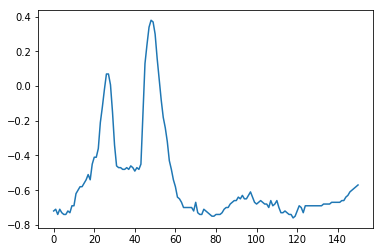

In [4]:
# for val in profile_dict.values():
#     print(len(val['points']))

# key0 = list(profile_dict.keys())[10]
# pointlist = profile_dict[key0]['points']
# profile = np.array([point[2] for point in pointlist])

# for i in range(len(pointlist)-1):
#     print(np.linalg.norm(np.array(pointlist[i]) - np.array(pointlist[i+1])))
    
# print(profile)
# sns.lineplot(data=profile)
dataaa = np.array([points[2] for points in surfaceline_dict['TPL_NHK_AFTAKKINGEN_ZW_1795']])
sns.lineplot(data=dataaa)

# Preprocess data for machine learning

In [5]:
# prepare data in sample_list format. with Y vectors of equal length to profile, containing a class number for each point
# classes
class_dict_regionaal = {
    "leeg": 0,
    "startpunt": 1,
    "buitenkruin": 2,
    "binnenkruin": 3,
    "binnenteen": 4,
    "insteek_sloot": 5
}

class_dict = {
    'leeg': 0,
    'Maaiveld binnenwaarts': 1,
    'Insteek sloot polderzijde': 2,
    'Slootbodem polderzijde': 3,
    'Slootbodem dijkzijde': 4,
    'Insteek sloot dijkzijde': 5,
    'Teen dijk binnenwaarts': 6,
    'Kruin binnenberm': 7,
    'binnenkruin': 7, # ben data
    'Insteek binnenberm': 8,
    'Kruin binnentalud': 9,
    'Verkeersbelasting kant binnenwaarts': 9, # 10
    'Kruin buitentalud': 11, #12
    'Verkeersbelasting kant buitenwaarts': 11,
    'Insteek buitenberm': 13,
    'Kruin buitenberm': 14,
    'buitenkruin':14, # ben data
    'Teen dijk buitenwaarts': 15,
    'Insteek geul': 16,
    'Teen geul': 17,
    'Teen dijk buitenwaarts': 18,
    'Maaiveld buitenwaarts': 19,
}

class_dict = class_dict_regionaal  

inverse_class_dict = {v: k for k, v in class_dict.items()}

# UNCOMMENT THIS FOR BETTER NAMES USING ORIGINAL DATA
# inverse_class_dict[9] = 'Kruin binnentalud'
# inverse_class_dict[11] = 'Kruin buitentalud'

X_samples_list = []
Y_samples_list = []
location_list = []

for location in surfaceline_dict.keys():
    heights = np.array(surfaceline_dict[location])[:,2].astype(np.float32)
    x_y_s = np.array(surfaceline_dict[location])[:,:2].astype(np.float32)

    labels = np.zeros(len(heights))

    for i, (key, point) in enumerate(cpoints_dict[location].items()):
        # if the point is not empty, find the nearest point in the surface file, 
        # rounding errors require matching by distance per point
        if point == (-1.0, -1.0, -1.0):
            continue

        distances = []
        for idx, surfacepoint in enumerate(surfaceline_dict[location]):
            dist = np.linalg.norm(np.array(surfacepoint)-np.array(point))
            distances.append((idx, dist))
        (idx, dist) = sorted(distances, key=itemgetter(1))[0]

        labels[idx] = class_dict[key]

    X_samples_list.append(heights)
    Y_samples_list.append(labels)
    location_list.append(location)
        #     print(len(labels))
#     print(len(heights))
#     print('-'*50)

print("average length of profile is: {}".format(np.array([len(sample) for sample in X_samples_list]).mean()))

assert len(Y_samples_list) == len(X_samples_list)
print("processed {} samples".format(len(Y_samples_list)))

average length of profile is: 151.0
processed 21350 samples


### Check the data visually

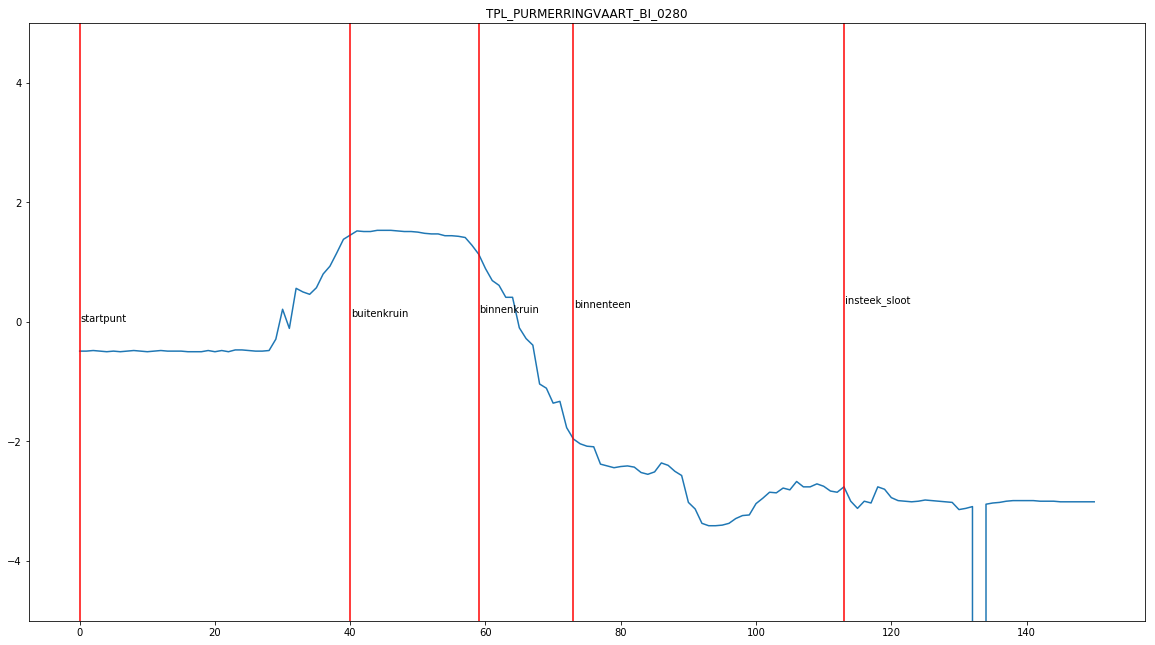

In [41]:
idx = np.random.randint(len(X_samples_list))
random_sample_x = X_samples_list[idx]
random_sample_y = Y_samples_list[idx]
location_name = location_list[idx]
fig, ax = plt.subplots(figsize=(20,11))
plt.title(location_name)
sns.lineplot(data=random_sample_x)
ax.set_ylim(top=5, bottom=-5)
label_height = 0
label_height_distance = np.max(random_sample_x)/19

for index, class_n in enumerate(random_sample_y):
    if class_n != 0:
        plt.axvline(index, 0,5, color='r')
        plt.text(index + 0.1, label_height, inverse_class_dict[class_n], rotation=0)
        label_height += label_height_distance


### filter unwanted examples

In [42]:
# use samples only from 12-2_130 to 12-2-445  and 12-2_501 to 12-2_831(only easy samples)
X_simple_list = []
Y_simple_list = []
location_simple_list = []

for i, location in enumerate(location_list):
    try:
        count = int(location.split('_')[-1])
    except:
        count = int(location.split(' ')[-1])
#     filters for the hard profiles of original data set 12-2
#     if count > 130 and count < 445:
#         X_simple_list.append(X_samples_list[i])
#         Y_simple_list.append(Y_samples_list[i])
#         location_simple_list.append(location_list[i])
    
#     if count > 501 and count < 831:
#         X_simple_list.append(X_samples_list[i])
#         Y_simple_list.append(Y_samples_list[i])
#         location_simple_list.append(location_list[i])
        
#   let everything pass
    X_simple_list.append(X_samples_list[i])
    Y_simple_list.append(Y_samples_list[i])
    location_simple_list.append(location_list[i])
        

# print(location_simple_list[5])
# sns.lineplot(data=X_simple_list[5])
# print(X_simple_list[5])
# print(Y_simple_list[5])
print("locations found after cleaning: {}".format(len(location_simple_list)))

locations found after cleaning: 21350


### Pad samples to equal length

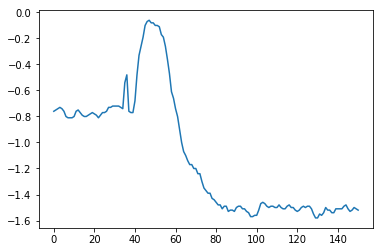

In [43]:
# inspect random profile
np.set_printoptions(suppress=True)
sns.lineplot(data=X_simple_list[np.random.randint(len(X_simple_list))])

In [44]:
padded_x = []
padded_y = []
padded_locations = []

for i, sample in enumerate(X_simple_list):
    if len(sample) > cutoff:
        continue
    x = np.zeros(cutoff)
    y = np.zeros(cutoff)
    x[:len(sample)] = X_simple_list[i]
    y[:len(sample)] = Y_simple_list[i]
    x[len(sample):] = x[len(sample)-1]
    padded_x.append(x)
    padded_y.append(y)
    padded_locations.append(location_simple_list[i])
    
X = np.array(padded_x)
y = np.array(padded_y)

print("samples after cutoff: {}".format(X.shape[0]))
# X = X.reshape(X.shape[0], X.shape[1], 1)
# X = X.reshape(X.shape[0], X.shape[1], 1)

y_cat = keras.utils.to_categorical(y, len(class_dict))

# len([len(sample) for sample in X_samples if len(sample) > 500])
# sns.lineplot(data=padded_x[320])
# print(padded_locations[320])

samples after cutoff: 21350


# Create model

### Model parameters

In [45]:
train_split = 0.8
shuffle = True

In [46]:
# forward fill the classes

def pandas_fill(arr):
    df = pd.DataFrame(arr)
#     df.fillna(method='ffill', axis=1, inplace=True)
    df.replace(to_replace=0, method='ffill', inplace=True)
    out = df.values
    return out

X = np.array(padded_x)
y = np.array(padded_y)
location_arr = np.array(padded_locations)

print("shape of Y data: {}".format(y.shape))
for i in range(y.shape[0]):
    sample = pandas_fill(y[i,:].flatten()).reshape(cutoff)
    y[i,:] = sample

# np.argmax(y_cat[0], axis=-1)

# sns.lineplot(data=X[110])
# print(location_arr[110])

shape of Y data: (21350, 400)


## split train-test

total examples: 21350
split index: 17080
training examples:17080, test examples: 4270


(-5, 5)

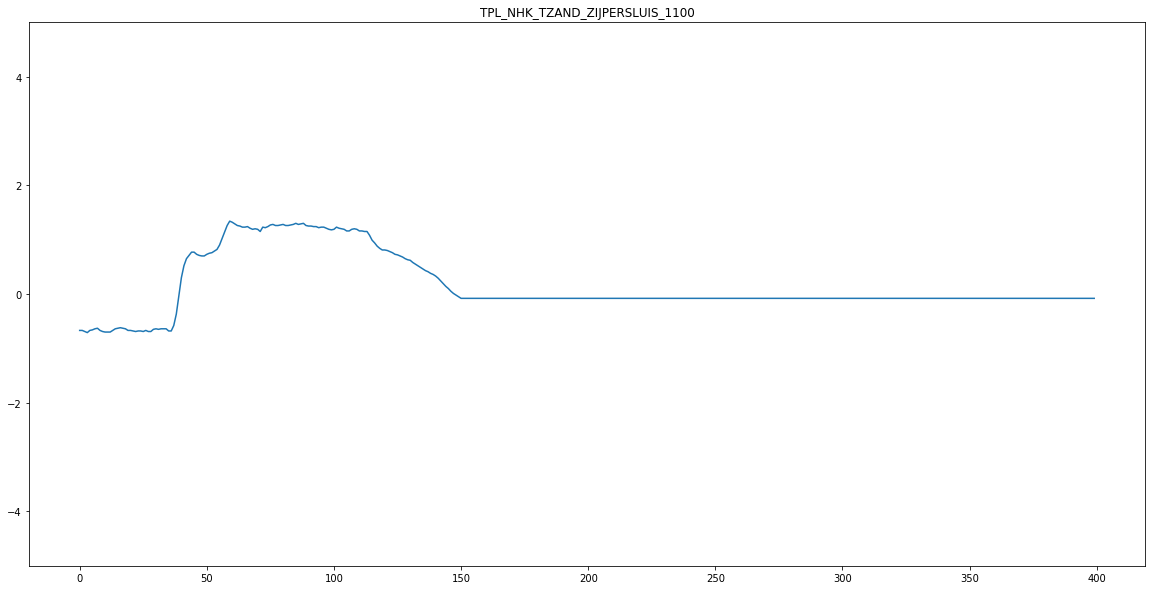

In [47]:
assert X.shape[0] == y_cat.shape[0]
print("total examples: {}".format(X.shape[0]))

split_index = math.floor(train_split * X.shape[0])
print("split index: {}".format(split_index))

shuff = np.arange(X.shape[0])
np.random.shuffle(shuff)
X = X[shuff]
y = y[shuff]
# y_cat = y_cat[shuff]
final_loc = location_arr[shuff]
# padded_locations = np.array(padded_locations)
# print(padded_locations)
y_cat = keras.utils.to_categorical(y, len(class_dict))

X_train = X[:split_index,:]
y_train = y_cat[:split_index,:,:]
locations_train = final_loc[:split_index]

X_test = X[split_index:,:]
y_test = y_cat[split_index:,:,:]
locations_test = final_loc[split_index:]

assert X_train.shape[0] == y_train.shape[0]
print("training examples:{}, test examples: {}".format(X_train.shape[0], y_test.shape[0]))

fig, ax = plt.subplots(figsize=(20,10))
randint = np.random.randint(X_train.shape[0])

plt.title(locations_train[randint])
sns.lineplot(data=X_train[randint])
ax.set_ylim(top=5,bottom=-5)


(21350, 300)
pca done
(21350, 2)


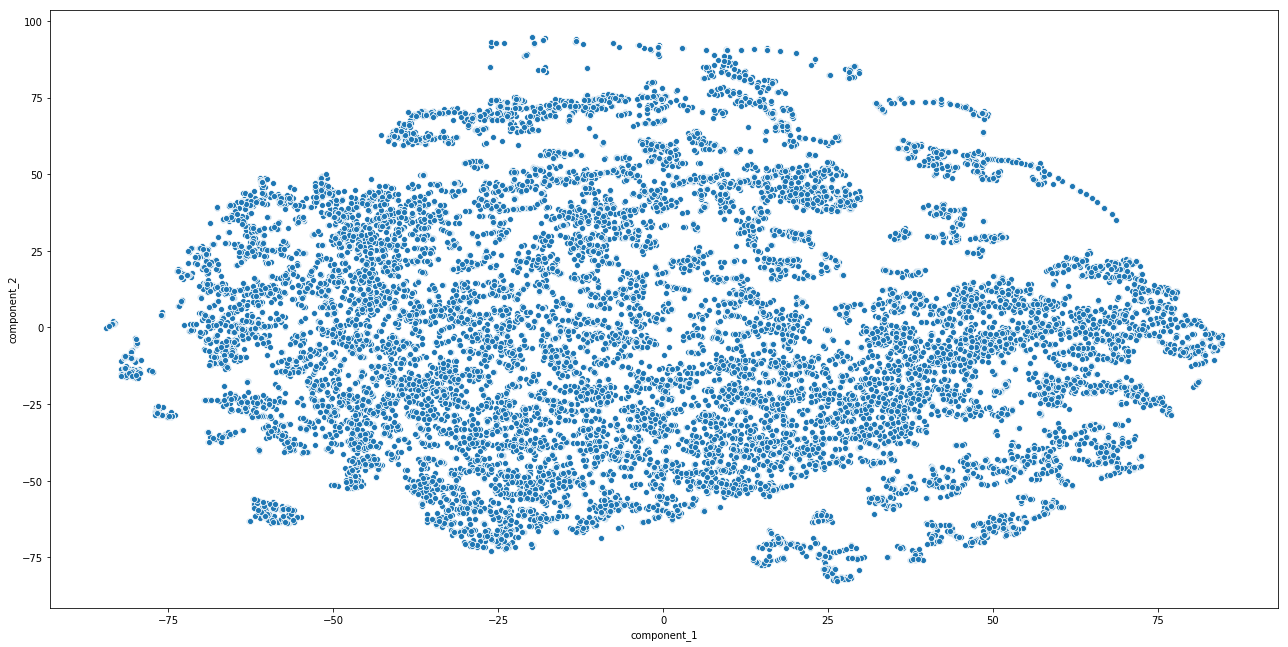

In [49]:
# TSNE DIMENSIONALITY REDUCTION
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

print(X.shape)
pca = PCA(n_components=50, svd_solver='full')
X_embedded = pca.fit_transform(X[:,:150])   
print("pca done")
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_embedded)
print(X_embedded.shape)
# # print(X_embedded)

test_df = pd.DataFrame(X_embedded, columns=["component_1",'component_2'])
# test_df['feature_number'] = np.arange(len(X_embedded))
# test_df['feature_name'] = intermed.columns

# # plt.figure(figsize=(44,44))
plt.figure(figsize=(22,11))
# cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
points = sns.scatterplot(x="component_1", y="component_2", data=test_df)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y'], str(point['val']), size='x-small')

# label_point(test_df.component_1, test_df.component_2, test_df.feature_name, plt.gca())

In [ ]:
model = Sequential()
model.add(Dense(cutoff, input_shape=(cutoff,)))
model.add(Reshape((cutoff,1)))
# model.add(Conv1D(8, kernel_size=3,activation='relu'))
model.add(Conv1D(32, kernel_size=5,activation='relu'))
# model.add(Conv1D(8, kernel_size=9,activation='relu'))
model.add(Conv1D(32, kernel_size=15,activation='relu'))
model.add(Dropout(0.25))
model.add(Conv1D(32, kernel_size=21,activation='relu'))
# model.add(Conv1D(16, kernel_size=51,activation='relu'))
model.add(Dropout(0.25))
model.add(Conv1D(32, kernel_size=101,activation='relu'))
# model.add(Conv1D(32, kernel_size=151,activation='relu'))
model.add(Flatten())
model.add(Dense(cutoff * len(class_dict), activation='relu'))
model.add(Reshape((cutoff,len(class_dict))))
model.compile(loss='mean_squared_logarithmic_error', # mean_squared_logarithmic_error
              optimizer='adam',
              metrics=['accuracy'])

# keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

In [48]:
def dijknet(input_size=(cutoff,1)):
    inputs = Input(input_size)
    conv1 = Conv1D(8,kernel_size=3,activation='relu',padding='same')(inputs)
    conv1 = Conv1D(8,kernel_size=3,activation='relu',padding='same')(conv1)
    pool1 = MaxPooling1D(pool_size=(2))(conv1)
    conv2 = Conv1D(16,kernel_size=3, activation='relu',padding='same')(pool1)
    conv2 = Conv1D(16,kernel_size=3, activation='relu',padding='same')(conv2)
    pool2 = MaxPooling1D(pool_size=(2))(conv2)
    
    conv3 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(pool2)
    conv3 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv3)
    
    pool3 = MaxPooling1D(pool_size=(2))(conv3)
    
    conv4 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(pool3)
    conv4 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    
    pool4 = MaxPooling1D(pool_size=(2))(drop4)
    
    conv5 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(pool4)
    conv5 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv5)
    
    drop5 = Dropout(0.5)(conv5)
    
    up6 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(UpSampling1D(size = (2))(drop5))
    merge6 = concatenate([drop4,up6], axis=2)
    conv6 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(merge6)
    conv6 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv6)
                                                                     
    up7 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(UpSampling1D(size = (2))(conv6))
    merge7 = concatenate([conv3,up7], axis=2)
    conv7 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(merge7)
    conv7 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv7)
                                                                     
    up8 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(UpSampling1D(size = (2))(conv7))
    merge8 = concatenate([conv2,up8], axis=2)
    conv8 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(merge8)
    conv8 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv8)
                                                                     
    up9 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(UpSampling1D(size = (2))(conv8))
    merge9 = concatenate([conv1,up9], axis=2)
    conv9 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(merge9)
    conv9 = Conv1D(32,kernel_size=3, activation='relu',padding='same')(conv9)
    flat = Flatten()(conv9)
#     model.add(Flatten())
    
    dense10 = Dense(cutoff * len(class_dict), activation='relu')(flat)
    output = Reshape((cutoff,len(class_dict)))(dense10)
                                                                     
    model = Model(input=inputs,output=output)
    model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error', metrics = ['accuracy'])
    
    return model
    
model = dijknet()
# # encoder decoden 1D network
# model = Sequential()
# model.add(Dense(cutoff, input_shape=(cutoff,)))
# model.add(Reshape((cutoff,1)))



# model.add(Dense(cutoff * 20, activation='relu'))
# model.add(Reshape((cutoff,20)))
# model.compile(loss='mean_squared_logarithmic_error', # mean_squared_logarithmic_error
#               optimizer='adam',
#               metrics=['accuracy'])

/data/anaconda3/envs/tfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`


In [50]:
# STANDARDIZE 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print(y.shape)
print(X_train.shape)
X_train_reshaped = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

print(X_train.shape)

# highest seems to be around 0.95
model.fit(X_train_reshaped, y_train,
# model.fit(X, y_cat,
          epochs=2048, # ;)
          batch_size=512,
          shuffle=True,
#           epochs=500,
#           batch_size=256,
#           validation_split=0.2,
          verbose=1,
          class_weight='auto') # pretty sure class weight is ignored

res = model.predict(X[0:2, :])
# res[0.shape]

(17080, 400)
(17080, 400)
Epoch 1/2048
14848/17080 [=========================>....] - ETA: 0s - loss: 0.0314 - acc: 0.6557

KeyboardInterrupt: 

In [51]:
loss, acc = model.evaluate(X_test_reshaped, y_test,batch_size=32)
print("loss: {}, accuracy: {}".format(loss, acc))

4270/4270 [==============================] - 1s 302us/step
loss: 0.04091581309113904, accuracy: 0.5946645185595653


In [52]:
# plot results from test set
preds = model.predict(X_test_reshaped)
randidx = np.random.randint(len(preds))
predicted = np.argmax(preds[randidx], axis=-1)
print(predicted.shape)
true = np.argmax(y_test[randidx], axis=-1)

# sns.lineplot(x=np.arange(predicted.shape[0]),y=predicted, label='predicted')
# sns.lineplot(x=np.arange(true.shape[0]),y=true, label='true')

# fig, ax = plt.subplots(figsize=(20,11))
# sns.lineplot(x=np.arange(predicted.shape[0]), y=X_test[randidx])
# sns.barplot(x=np.arange(predicted.shape[0]),y=predicted, label='predicted')
# last_class = 19
# for i in range(predicted):
#     print(predicted[i])


(400,)


In [76]:
randidx = np.random.randint(len(preds))
print(preds[0].shape)
# print(np.max(preds[0], axis=-1))
predicted = np.argmax(preds[randidx], axis=-1)
# print(predicted.shape)
true = np.argmax(y_test[randidx], axis=-1)

(400, 6)


(-5, 5)

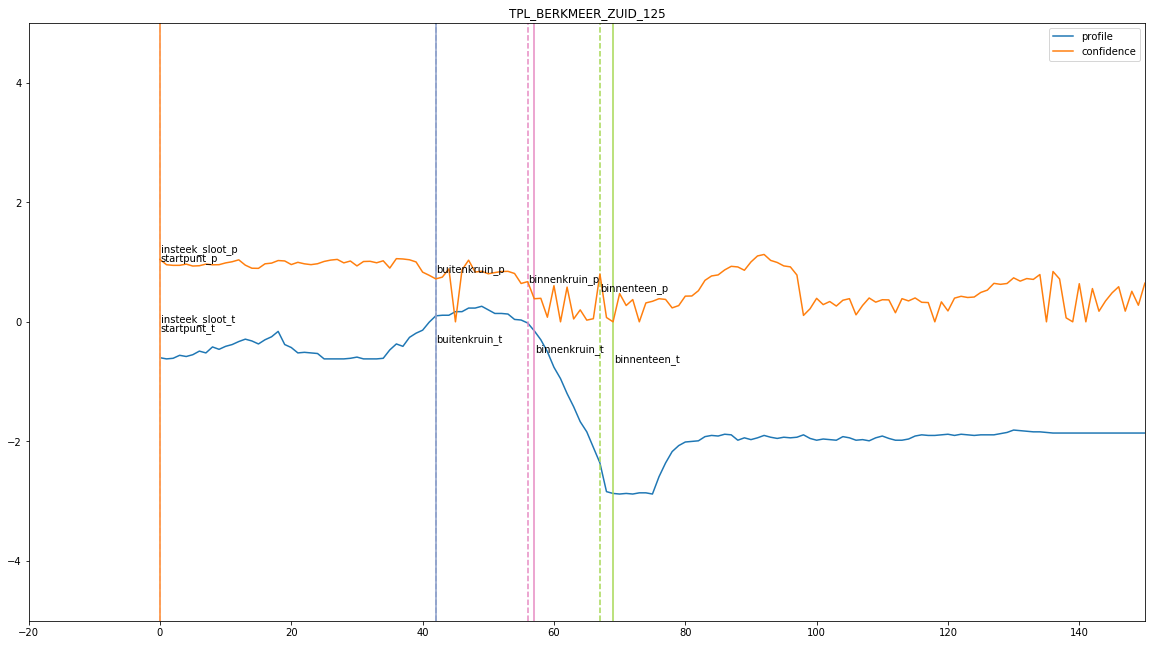

In [77]:
cmap = sns.color_palette("Set2",20)

# cmap1 = sns.color_palette("Paired",38)
# cmap2 = sns.color_palette("Paired",38)
fig, ax = plt.subplots(figsize=(20,11))
sns.lineplot(x=np.arange(predicted.shape[0]), y=X_test[randidx], label='profile')
# sns.lineplot(x=np.arange(100), y=X_test[randidx][:100])
# predicted = predicted[:100,:,:]
plt.title(locations_test[randidx])

# TRUE PLOT
last_class = 5
change_indices = [(0,5)]
for i, class_n in enumerate(true):
    if class_n != last_class and class_n != 0:
        change_indices.append((i, class_n))
        last_class = class_n

already_classified = []
cleaned_change_indices = []
for class_tuple in change_indices:
    if class_tuple[1] not in already_classified:
        already_classified.append(class_tuple[1])
        cleaned_change_indices.append(class_tuple)

# print(change_indices)
# print(cleaned_change_indices) 

label_height = 0
coloridx = 0
label_height_distance = (np.max(X_test[randidx]) + np.abs(np.min(X_test[randidx])) )/19
for index, class_n in cleaned_change_indices:
    plt.axvline(index, 0,np.max(X_test[randidx]) + np.abs(np.min(X_test[randidx])), color=cmap[class_n])
    plt.text(index + 0.1, -label_height, inverse_class_dict[class_n] + "_t", rotation=0)
    label_height += label_height_distance
    coloridx += 1

# PREDICTED PLOT 
last_class = 5
change_indices = [(0,5)]
for i, class_n in enumerate(predicted):
    if class_n != last_class and class_n != 0:
        change_indices.append((i, class_n))
        last_class = class_n

already_classified = []
cleaned_change_indices = []
for class_tuple in change_indices:
    if class_tuple[1] not in already_classified:
        already_classified.append(class_tuple[1])
        cleaned_change_indices.append(class_tuple)

# print(change_indices)
# print(cleaned_change_indices)

coloridx = 0
label_height = label_height - 2
for index, class_n in cleaned_change_indices:
    plt.axvline(index, 0,np.max(X_test[randidx]) + np.abs(np.min(X_test[randidx])), color=cmap[class_n], linestyle='--')
    plt.text(index + 0.1, -label_height, inverse_class_dict[class_n] + "_p", rotation=0)
    label_height += label_height_distance
    coloridx += 1
    
sns.lineplot(data=np.max(preds[0], axis=-1), label='confidence')
# custom_lines = [Line2D([0], [0], color='b', lw=4),
#                 Line2D([0], [0], color='g', lw=4),
#                 Line2D([0], [0], color="r", lw=4)]

ax.set_xlim(right=150)
ax.set_ylim(top=5, bottom=-5)

# ax.legend(custom_lines, ['profile', 'true', 'predicted'])

In [ ]:
np.max(X_test[randidx])

# other stuff

In [ ]:
actual_res = res[0,:,:]
print(np.argmax(y_cat[0], axis=-1))
print(np.argmax(actual_res, axis=-1))
# actual_res[:10,:]
sns.lineplot(data=np.argmax(actual_res, axis=-1))
sns.lineplot(data=np.argmax(y_cat[0], axis=-1))

# def parse_results(predictions):
#     flat_pred = np.argmax(predictions, axis=-1)
#     parsed_already = []
#     for i in range(len(flat_pred)):
#         if flat_pred[i] in parsed_already:
#             node_preds = reversed(list(np.argsort(predictions[i,:])))
            
#             for c in range(num_classes):
#                 if nodepreds(c) in parsed_already:
#                     continue
#                 else:
                    
#                 node_preds
#         else:
#             parsed_already.append(flat_pred[i])
            
            
#     for class_name in class_dict.keys():
        

In [ ]:
from sklearn.utils import class_weight

print(padded_y[0].shape)

class_weights = class_weight.compute_class_weight('balanced', np.unique(padded_x), padded_x)

In [ ]:
ii = 38
np.set_printoptions(suppress=True)
res = model.predict(X[ii:ii+2, :])

# res_0 = res[1].reshape((380,20))
# print(res[0].shape)
# print(np.argmax(res_0, axis=-1))
# print(y[1])
res[res <0] = 0

y_arr = np.array(np.array(new_ys[ii]) * 380, dtype=np.int32)
y_transform = np.zeros(380)
y_transform[y_arr] = 1


print(res[0])
print(new_ys[ii])
xres = np.array(np.array(res[0]) * 380, dtype=np.int32)
yres = np.ones(len(xres))
sns.scatterplot(xres, X[ii,:][xres])
sns.scatterplot(y_arr, X[ii,:][y_arr])
sns.lineplot(np.arange(380), X[ii,:])

In [ ]:
test_y = y[0]
np.argwhere(test_y == 18)
new_y = np.zeros(20)
present_classes = list(np.unique(test_y))
present_classes.remove(0)
for i in present_classes:
    idx = np.argwhere(test_y == i)
    new_y[int(i)] = idx
    
# print(new_y/380)
# print(y.shape)
new_ys = []

for j in range(y.shape[0]):
    test_y = y[j,:]
    new_y = np.zeros(20)
    present_classes = list(np.unique(test_y))
    present_classes.remove(0)
    for i in present_classes:
        idx = np.argwhere(test_y == i)
        new_y[int(i)] = idx
    new_ys.append(new_y / 380)
    
print(new_ys)